In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import requests
import json
from citipy import citipy 
import time 
from datetime import datetime
import os
from dotenv import load_dotenv
load_dotenv()
weather_api_key = os.getenv("weather_api_key")

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs) 
coordinates 

[(-10.336543762954705, -127.94607293651234),
 (-27.671421893762272, -118.79107057210489),
 (37.0066795898566, 14.359687384968169),
 (-88.77043624128459, 43.282283813327496),
 (33.768679804164734, 108.92494766290815),
 (-60.158545703920716, -155.53979954198948),
 (-29.307723421304907, 155.05798560939206),
 (-5.545153584958783, 85.81880875963941),
 (-42.75372033661304, -163.32446640551208),
 (-26.812307232833668, -154.7127055560503),
 (86.65855776608339, -159.47564085788446),
 (-86.89298651508484, 91.38722818066276),
 (3.650601419622717, -135.3002154859863),
 (42.91282483415492, 125.50506380982978),
 (-75.67910307438149, 116.64816264142115),
 (-71.21436669396674, -99.95748500908725),
 (40.40720987693331, 82.1091815579328),
 (-46.08782336710043, 118.34711576698123),
 (53.04839137811763, -124.78420607631176),
 (74.94100946420068, -74.5162390542862),
 (-53.21244077344984, 2.5653203818346526),
 (28.512183231487185, 105.81038501217517),
 (-21.21489384782555, -84.3976613586762),
 (58.208219680

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-10.336543762954705 -127.94607293651234
-27.671421893762272 -118.79107057210489
37.0066795898566 14.359687384968169
-88.77043624128459 43.282283813327496
33.768679804164734 108.92494766290815
-60.158545703920716 -155.53979954198948
-29.307723421304907 155.05798560939206
-5.545153584958783 85.81880875963941
-42.75372033661304 -163.32446640551208
-26.812307232833668 -154.7127055560503
86.65855776608339 -159.47564085788446
-86.89298651508484 91.38722818066276
3.650601419622717 -135.3002154859863
42.91282483415492 125.50506380982978
-75.67910307438149 116.64816264142115
-71.21436669396674 -99.95748500908725
40.40720987693331 82.1091815579328
-46.08782336710043 118.34711576698123
53.04839137811763 -124.78420607631176
74.94100946420068 -74.5162390542862
-53.21244077344984 2.5653203818346526
28.512183231487185 105.81038501217517
-21.21489384782555 -84.3976613586762
58.20821968061429 -4.215352446287824
-50.3047220536062 -82.40188663851114
58.39710914144689 4.174672728286396
-87.69352905442331 

46.731194338414895 -154.58527864855589
86.64436532032397 -103.74048827124376
-62.440395679403125 150.70380053953215
-77.349671247205 -29.243501684887093
-20.4828761468424 -158.30385950179448
37.924332791738294 -79.27557750377504
9.609843046407008 2.974192062073115
86.3000146574459 71.51959418568012
-45.457764152989924 -27.499180857204095
73.31795159216608 -25.99395468153034
-74.06901782119529 -77.46671330392095
45.009356593349224 146.48070041380544
39.462852006008035 -55.50710224824459
-75.14575017161066 60.007559779534404
-12.333611217587887 154.35108775413045
8.962969743897489 179.5961631109002
-76.00388581087378 90.12683165524697
41.542248370360056 157.67100816719653
-7.581536226300813 -176.27331587586755
-84.4066000996123 37.43041547261001
43.12654433383639 -108.89115460942088
-79.8124121318998 -110.68738454097989
17.588889300517266 -68.20926798811499
68.54452707275104 119.3478453785001
52.77667431582978 -154.43548159184925
9.371754667196157 124.44483828305636
10.752392988420397 -1

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city) 
# Print the city count to confirm sufficient count.
len(cities) 

602

In [12]:
# Starting URL for Weather Map API Call.
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1 

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i] 

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
         
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 13 | vredendal
Processing Record 3 of Set 13 | matara
Processing Record 4 of Set 13 | bethel
Processing Record 5 of Set 13 | praia
Processing Record 6 of Set 13 | vila
Processing Record 7 of Set 13 | castro
Processing Record 8 of Set 13 | avarua
Processing Record 9 of Set 13 | tiksi
Processing Record 10 of Set 13 | chapais
Processing Record 11 of Set 13 | kavieng
Processing Record 12 of Set 13 | warqla
City not found. Skipping...
Processing Record 13 of Set 13 | zabol
Processing Record 14 of Set 13 | sarlat-la-caneda
Processing Record 15 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 13 | yichun
Processing Record 17 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 13 | mataura
Processing Record 19 of Set 13 | villarrobledo
Processing Record 20 of Set 13 | yellowknife
Processing Record 21 of Set 13 | beringovskiy
Processing

Processing Record 32 of Set 16 | yomitan
City not found. Skipping...
Processing Record 33 of Set 16 | najran
Processing Record 34 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 35 of Set 16 | kabalo
Processing Record 36 of Set 16 | conceicao do araguaia
Processing Record 37 of Set 16 | gornopravdinsk
Processing Record 38 of Set 16 | marawi
Processing Record 39 of Set 16 | dunmore town
Processing Record 40 of Set 16 | norman wells
Processing Record 41 of Set 16 | le port
Processing Record 42 of Set 16 | labuhan
Processing Record 43 of Set 16 | hilo
Processing Record 44 of Set 16 | kodiak
Processing Record 45 of Set 16 | alice springs
Processing Record 46 of Set 16 | sibolga
Processing Record 47 of Set 16 | cherskiy
Processing Record 48 of Set 16 | ponta do sol
Processing Record 49 of Set 16 | chokurdakh
Processing Record 50 of Set 16 | meulaboh
Processing Record 1 of Set 17 | yerbogachen
Processing Record 2 of Set 17 | dryden
Processing Record 3 of Set 17 | ahipara
P

Processing Record 18 of Set 20 | bose
Processing Record 19 of Set 20 | barra dos coqueiros
Processing Record 20 of Set 20 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 20 | fayetteville
Processing Record 22 of Set 20 | karachi
Processing Record 23 of Set 20 | petropavlovsk-kamchatskiy
Processing Record 24 of Set 20 | balkanabat
Processing Record 25 of Set 20 | atar
Processing Record 26 of Set 20 | maningrida
Processing Record 27 of Set 20 | goundi
Processing Record 28 of Set 20 | sorong
Processing Record 29 of Set 20 | virginia beach
Processing Record 30 of Set 20 | tiarei
Processing Record 31 of Set 20 | heilbron
Processing Record 32 of Set 20 | mazara del vallo
Processing Record 33 of Set 20 | hithadhoo
Processing Record 34 of Set 20 | peniche
Processing Record 35 of Set 20 | high level
Processing Record 36 of Set 20 | soligalich
Processing Record 37 of Set 20 | dukat
Processing Record 38 of Set 20 | fairbanks
Processing Record 39 of Set 20 | kimi
City not fou

Processing Record 3 of Set 24 | kaduqli
Processing Record 4 of Set 24 | coahuayana
Processing Record 5 of Set 24 | aurillac
Processing Record 6 of Set 24 | salalah
Processing Record 7 of Set 24 | gigmoto
Processing Record 8 of Set 24 | kattivakkam
Processing Record 9 of Set 24 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 24 | paucartambo
City not found. Skipping...
Processing Record 11 of Set 24 | saint-francois
Processing Record 12 of Set 24 | paramonga
Processing Record 13 of Set 24 | raurkela
City not found. Skipping...
Processing Record 14 of Set 24 | mananjary
Processing Record 15 of Set 24 | tambovka
Processing Record 16 of Set 24 | paragominas
Processing Record 17 of Set 24 | necochea
Processing Record 18 of Set 24 | la ronge
Processing Record 19 of Set 24 | ambon
Processing Record 20 of Set 24 | przhevalskoye
Processing Record 21 of Set 24 | kisangani
Processing Record 22 of Set 24 | igarka
Processing Record 23 of Set 24 | dergachi
Processing Record 2

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10) 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vredendal,-31.6683,18.5012,45.95,59,0,6.42,ZA,2022-08-01 04:44:56
1,Matara,5.9485,80.5353,78.51,89,98,15.99,LK,2022-08-01 04:44:56
2,Bethel,41.3712,-73.4140,74.25,88,75,3.44,US,2022-08-01 04:44:57
3,Praia,14.9215,-23.5087,77.54,73,75,11.50,CV,2022-08-01 04:44:58
4,Vila,42.0304,-8.1588,63.48,51,0,4.36,PT,2022-08-01 04:44:58
5,Castro,-24.7911,-50.0119,51.24,80,0,1.66,BR,2022-08-01 04:44:59
6,Avarua,-21.2078,-159.7750,73.45,88,40,10.36,CK,2022-08-01 04:44:59
7,Tiksi,71.6872,128.8694,40.17,93,100,17.05,RU,2022-08-01 04:45:00
8,Chapais,49.7834,-74.8492,56.98,84,95,3.58,CA,2022-08-01 04:45:00
9,Kavieng,-2.5744,150.7967,85.06,71,82,17.45,PG,2022-08-01 04:45:01


In [14]:
city_data_reordered = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']  
city_data_df = city_data_df[city_data_reordered] 
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vredendal,ZA,2022-08-01 04:44:56,-31.6683,18.5012,45.95,59,0,6.42
1,Matara,LK,2022-08-01 04:44:56,5.9485,80.5353,78.51,89,98,15.99
2,Bethel,US,2022-08-01 04:44:57,41.3712,-73.4140,74.25,88,75,3.44
3,Praia,CV,2022-08-01 04:44:58,14.9215,-23.5087,77.54,73,75,11.50
4,Vila,PT,2022-08-01 04:44:58,42.0304,-8.1588,63.48,51,0,4.36
...,...,...,...,...,...,...,...,...,...
568,Mandalgovi,MN,2022-08-01 04:50:29,45.7625,106.2708,83.53,25,46,12.33
569,Iquitos,PE,2022-08-01 04:50:35,-3.7481,-73.2472,77.04,94,75,4.61
570,Kashan,IR,2022-08-01 04:50:35,33.9831,51.4364,87.39,25,2,4.61
571,Kupang,ID,2022-08-01 04:50:36,-10.1667,123.5833,84.58,62,46,3.98


In [69]:
# Create the output file (CSV).
 
output_data_file = "/Users/kristafederas/Desktop/UCB/Module6Challenge/World_Weather_Analysis/weather_data/cities.csv"
    
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [70]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"] 

In [74]:
# Get today's date in seconds.
today = time.time()
today 

1659332699.720209

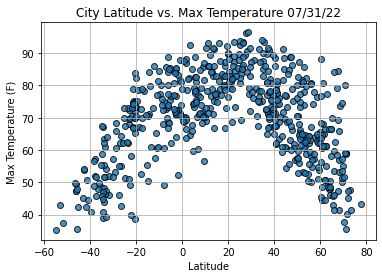

In [76]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/kristafederas/Desktop/UCB/Module6Challenge/World_Weather_Analysis/weather_data/Fig1.png")

# Show plot.
plt.show()

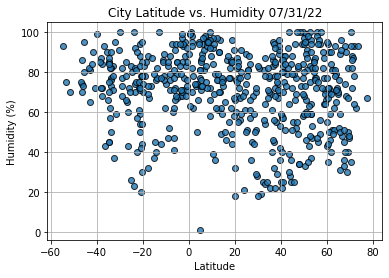

In [80]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/kristafederas/Desktop/UCB/Module6Challenge/World_Weather_Analysis/weather_data/Fig2.png")
# Show plot.
plt.show()

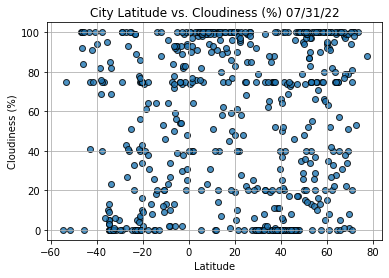

In [81]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/kristafederas/Desktop/UCB/Module6Challenge/World_Weather_Analysis/weather_data/Fig3.png")
# Show plot.
plt.show()

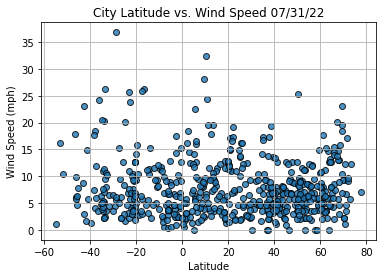

In [82]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/kristafederas/Desktop/UCB/Module6Challenge/World_Weather_Analysis/weather_data/Fig4.png")
# Show plot.
plt.show()

In [85]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [86]:
index13 = city_data_df.loc[13] 
index13 

City                      Mataura
Country                        NZ
Date          2022-08-01 04:45:05
Lat                      -46.1927
Lng                      168.8643
Max Temp                    49.48
Humidity                       74
Cloudiness                     92
Wind Speed                   6.13
Name: 13, dtype: object

In [87]:
city_data_df['Lat'] >= 0 

0      False
1       True
2       True
3       True
4       True
       ...  
568     True
569    False
570     True
571    False
572     True
Name: Lat, Length: 573, dtype: bool

In [88]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head() 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Matara,LK,2022-08-01 04:44:56,5.9485,80.5353,78.51,89,98,15.99
2,Bethel,US,2022-08-01 04:44:57,41.3712,-73.4140,74.25,88,75,3.44
3,Praia,CV,2022-08-01 04:44:58,14.9215,-23.5087,77.54,73,75,11.50
4,Vila,PT,2022-08-01 04:44:58,42.0304,-8.1588,63.48,51,0,4.36
7,Tiksi,RU,2022-08-01 04:45:00,71.6872,128.8694,40.17,93,100,17.05


In [89]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)] 

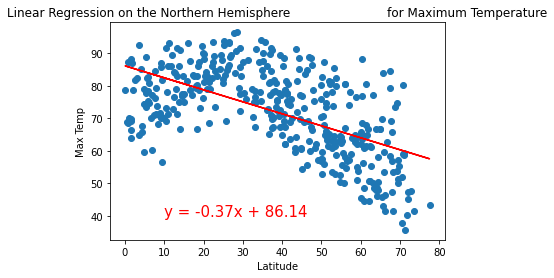

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

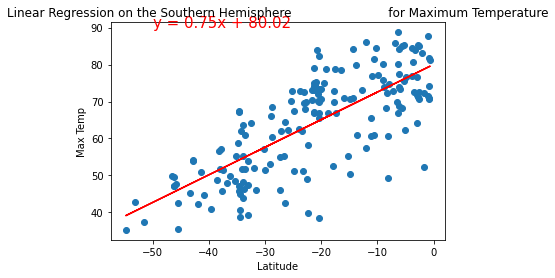

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

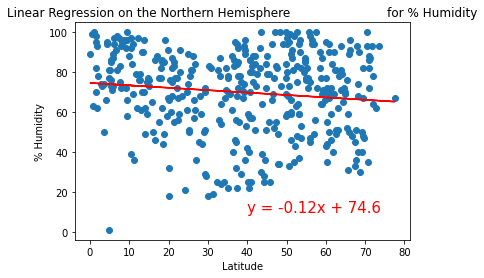

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

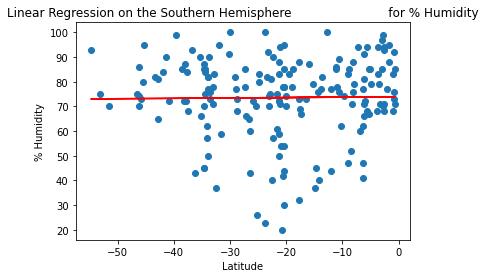

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

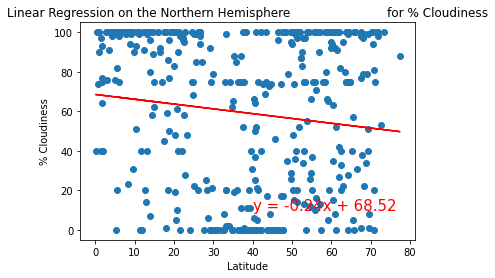

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10)) 

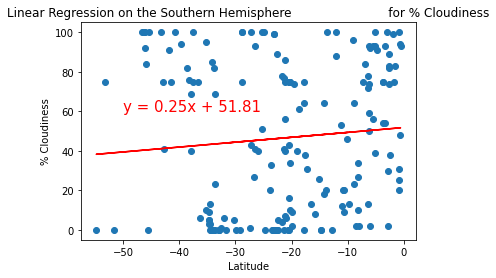

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

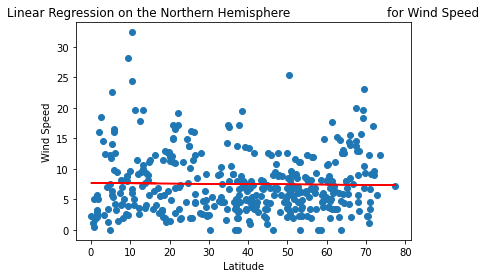

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

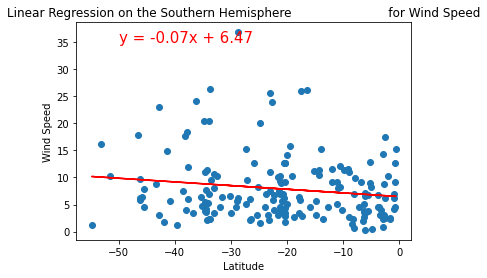

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))